# Heat capacity at constant pressure

How much heat is required to elevate the temperature of
3 moles of gaseous CO₂ from 25°C to 300°C at constant pressure? Take into account that the heat capacity is temperature dependent. How much of an error would you make if you neglect the T-dependence?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

## Strategy

Here we remember that at constant pressure, the _enthalpy_ exactly measure the heat exchange, i.e. $\Delta H = dq$.
We therefore need to find the change in enthalpy as we elevate the temperature at constant pressure. This is described by the _heat capacity_,
$$
C_p(T) = \left(\frac{\partial H(T)}{\partial T} \right)_p
$$
where we note that the enthalpy, $H$, is generally a function of temperature and so is the heat capacity. For small temperature changes we can sometimes neglect this dependency, but here we describe it explicitly using numerical integration. Experimental data for $C_p(T)$ are often fitted to polynomia and available in tables.

In [2]:
def Cp(T):
    ''' Molar heat capacity of CO2 as a function of temperature '''
    return 44.22 + 8.79e-3 * T  -8.62e5 / T**2

In [3]:
n = 3             # mol
T1 = 273.15 + 25  # K
T2 = 273.15 + 300 # K
dH = n * integrate.quad(Cp, T1, T2)[0] # J
print(f"ΔH = {dH / 1000:.1f} kJ")

ΔH = 35.5 kJ


Had we assumed a temperature independent heat capacity,
e.g. fixed at 300 K, we get the following:

In [4]:
dH_fix = n * Cp(T1) * (T2 - T1)
error = (dH - dH_fix) / dH
print(f"ΔH = {dH_fix / 1000:.1f} kJ ({error * 100:.1f}% error)")

ΔH = 30.6 kJ (13.6% error)


Text(385, 20, '$\\Delta H = dq$')

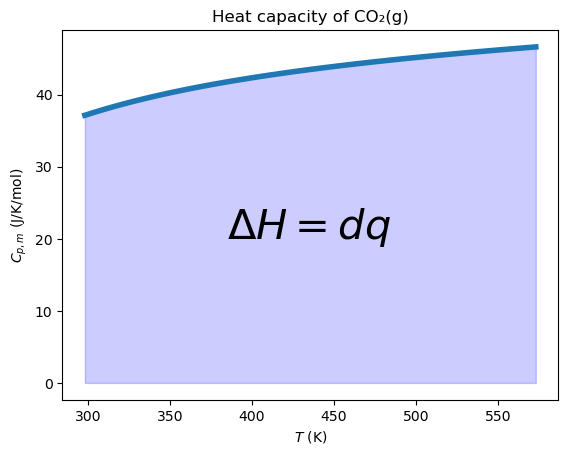

In [5]:
T = np.linspace(T1, T2, 50)
plt.plot(T, np.vectorize(Cp)(T), lw=4, alpha=1)
plt.title("Heat capacity of CO₂(g)")
plt.xlabel(r'$T$ (K)')
plt.ylabel(r'$C_{p,m}$ (J/K/mol)');
plt.fill_between(x=T, y1= np.vectorize(Cp)(T), color= "b", alpha= 0.2)
plt.text(385, 20, "$\Delta H = dq$", fontsize=30)